In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the files

In [2]:
# Load CSV file
purchase_behaviour = pd.read_csv('C:/Users/Lekhansh/Downloads/QVI_purchase_behaviour.csv')

# Load XLSX file
transaction_data = pd.read_excel('C:/Users/Lekhansh/Downloads/QVI_transaction_data.xlsx')


## Summary of the Data

In [3]:
# Summarize the purchase behaviour data
print(purchase_behaviour.describe())
print(purchase_behaviour.info())

# Summarize the transaction data
print(transaction_data.describe())
print(transaction_data.info())

       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
5

Purchase Behaviour Data
1. The LYLTY_CARD_NBR variable shows a wide range, with a mean and median that suggest a fairly uniform distribution but with significant variability.
2. The data contains only non-null values and seems to be well-structured for further analysis.

Transaction Data
1. The TOT_SALES and PROD_QTY variables show relatively low mean values with a wide range, indicating some high-value transactions.
2. The PROD_NBR and STORE_NBR show a broad range, indicating multiple products and stores involved.
3. The data is dense, suggesting a large number of transactions, making it suitable for detailed analysis and trend identification.

## Outlier Detection and Handling

Now we will check for the outliers in columns "TOT_SALES" and "PROD_QTY"

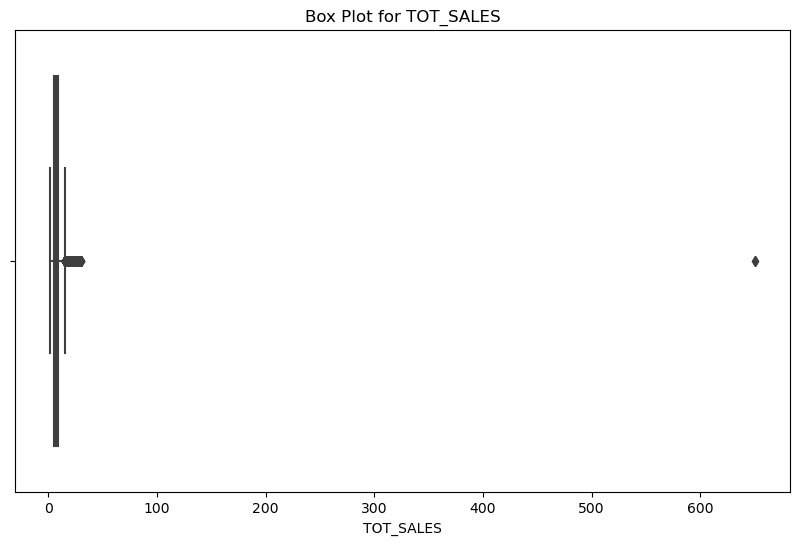

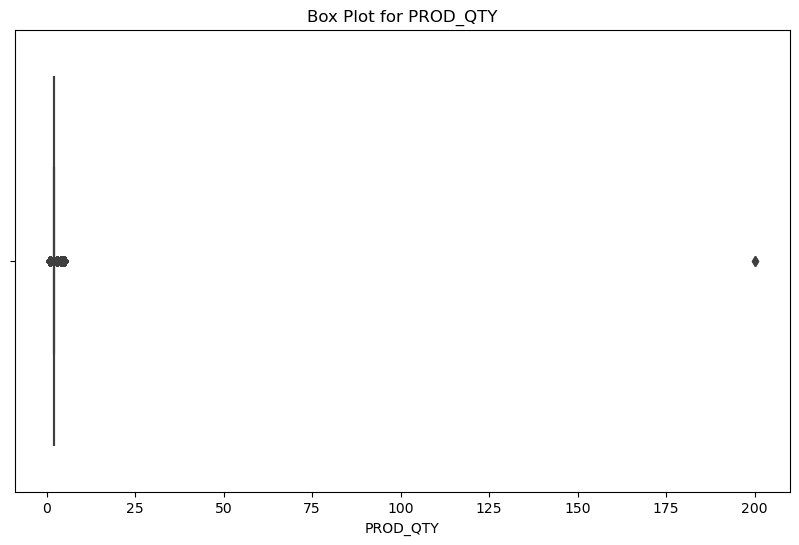

In [4]:
# Columns to check for outliers
columns_to_check = ['TOT_SALES', 'PROD_QTY']

# Plot box plots to visualize outliers
for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=transaction_data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


In [5]:
# Remove outliers in 'TOT_SALES'
lower_bound_sales = transaction_data['TOT_SALES'].quantile(0.25) - 1.5 * (transaction_data['TOT_SALES'].quantile(0.75) - transaction_data['TOT_SALES'].quantile(0.25))
upper_bound_sales = transaction_data['TOT_SALES'].quantile(0.75) + 1.5 * (transaction_data['TOT_SALES'].quantile(0.75) - transaction_data['TOT_SALES'].quantile(0.25))


In [6]:
# Cap outliers in 'TOT_SALES'
transaction_data['TOT_SALES'] = np.clip(transaction_data['TOT_SALES'], lower_bound_sales, upper_bound_sales)

In [9]:
# Cap the outlier value to 10 (the upper range of normal values)
transaction_data['PROD_QTY'] = np.clip(transaction_data['PROD_QTY'], None, 10)

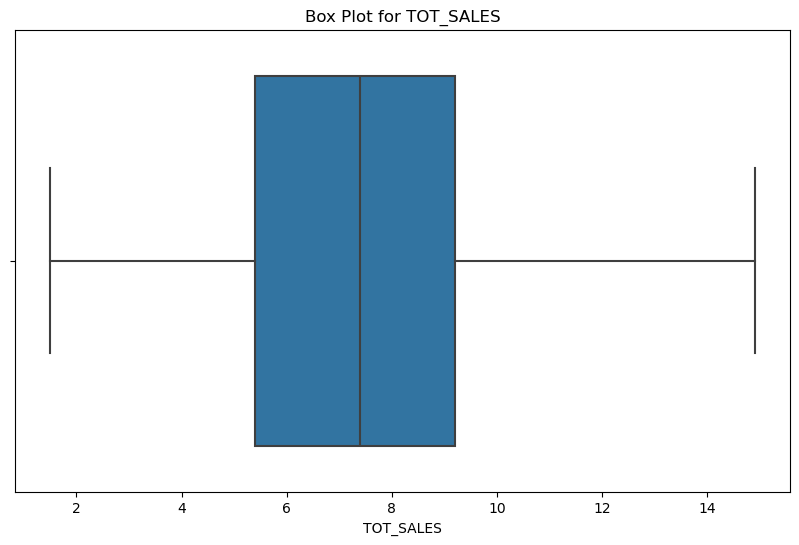

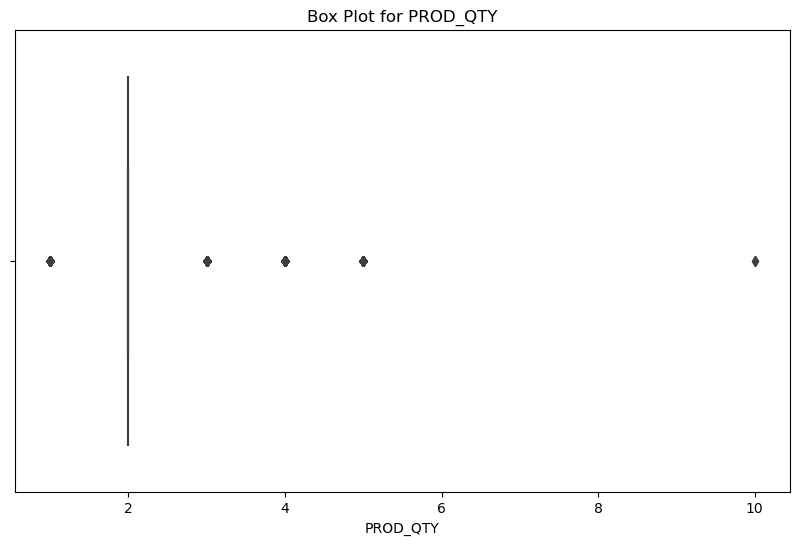

In [10]:
# Columns to check for outliers
columns_to_check = ['TOT_SALES', 'PROD_QTY']

# Plot box plots to visualize outliers
for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=transaction_data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

## Missing Values Check

In [12]:
# Checking missing values in purchase_behaviour table
print("Missing values in purchase_behaviour table:")
missing_values_purchase_behaviour = purchase_behaviour.isnull().sum()
print(missing_values_purchase_behaviour)

# Checking missing values in transaction_data table
print("\nMissing values in transaction_data table:")
missing_values_transaction_data = transaction_data.isnull().sum()
print(missing_values_transaction_data)

Missing values in purchase_behaviour table:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Missing values in transaction_data table:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


## Additional Data Cleaning

1. Data Formatting
2. Correction of Date Column - from string to date format
3. Removal of unnecessary values

As we can see there are no missing values, but we will check the format of the data

In [15]:
# Check the data types (formats) of all variables in transaction_data
print("Data types in transaction_data:")
print(transaction_data.dtypes)

# Check the data types (formats) of all variables in customer_data
print("\nData types in customer_data:")
print(purchase_behaviour.dtypes)

Data types in transaction_data:
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Data types in customer_data:
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


The DATE column is currently in integer format, so we need to convert it to a proper date format.

In [16]:
# Convert 'DATE' column to datetime format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

# Check the conversion
print(transaction_data['DATE'].head())

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


Exploring the PROD_NAME column to ensure only chip products are included.

In [17]:
# Check unique product names
print(transaction_data['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [18]:
# Remove salsa products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False)]

# Verify the removal
print(transaction_data['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Thins Chips         Originl saltd 175g'
 'Red Rock De

## Sales Trends Over Time

C:\Users\Lekhansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lekhansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


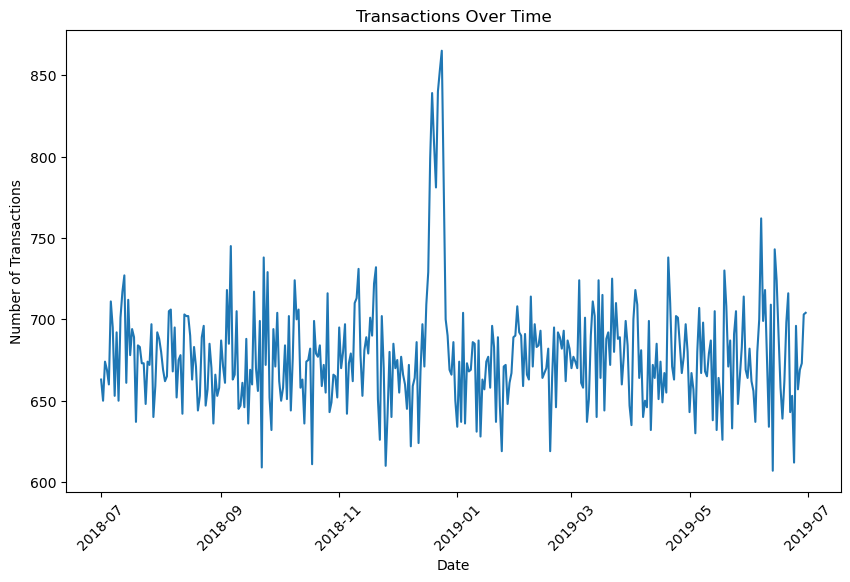

In [19]:
# Group by date to count transactions
transactions_by_day = transaction_data.groupby('DATE').size().reset_index(name='transaction_count')

# Plot transactions over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='DATE', y='transaction_count', data=transactions_by_day)
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

## New Features

Creating PACK_SIZE and BRAND Features

In [20]:
# Extract pack size by finding digits in 'PROD_NAME'
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)').astype(float)

# Extract brand name as the first word of 'PROD_NAME'
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

# Check the new columns
print(transaction_data[['PACK_SIZE', 'BRAND']].head())

   PACK_SIZE    BRAND
0      175.0  Natural
1      175.0      CCs
2      170.0   Smiths
3      175.0   Smiths
4      150.0   Kettle


In [24]:
print(transaction_data['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


Some brands may need to be combined for consistency (e.g., "RED" and "RRD").

In [26]:
# Clean brand names by combining similar names
transaction_data['BRAND'] = transaction_data['BRAND'].replace({'Red': 'RRD'})

# Check the updated brand names
print(transaction_data['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'RRD' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


## Merging Data

Now, merging the transaction data with the customer data to analyze customer segments.

In [29]:
# Merge transaction data with customer data on loyalty card number
merged_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

# Check for missing customer details
print(merged_data.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


## Analyzing Sales by Customer Segments

Let’s calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER.

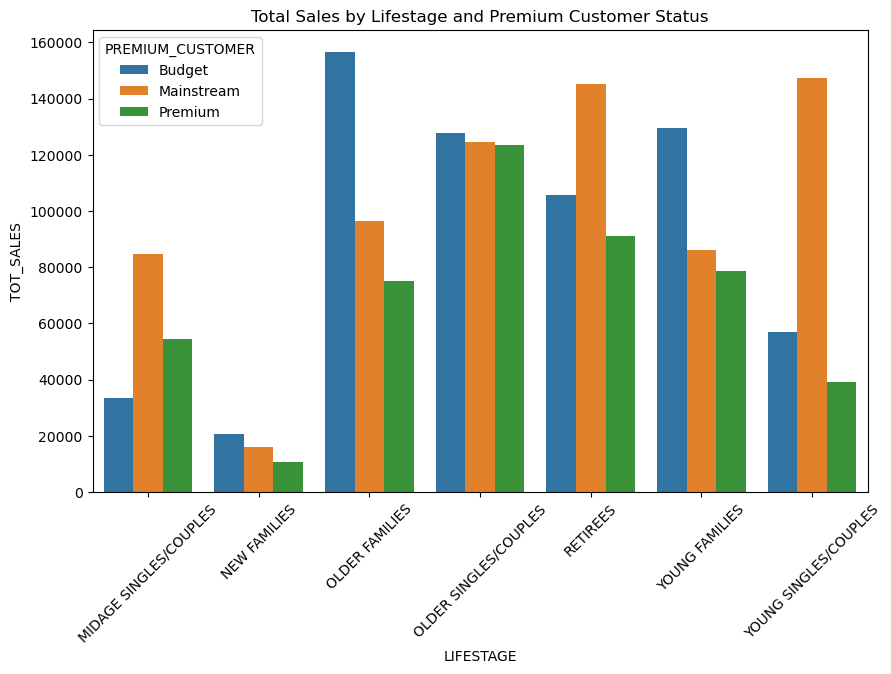

In [30]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Plot total sales by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=sales_by_segment)
plt.title('Total Sales by Lifestage and Premium Customer Status')
plt.xticks(rotation=45)
plt.show()

## Number of Customers by Segment

Next, we can analyze the number of customers in each segment.

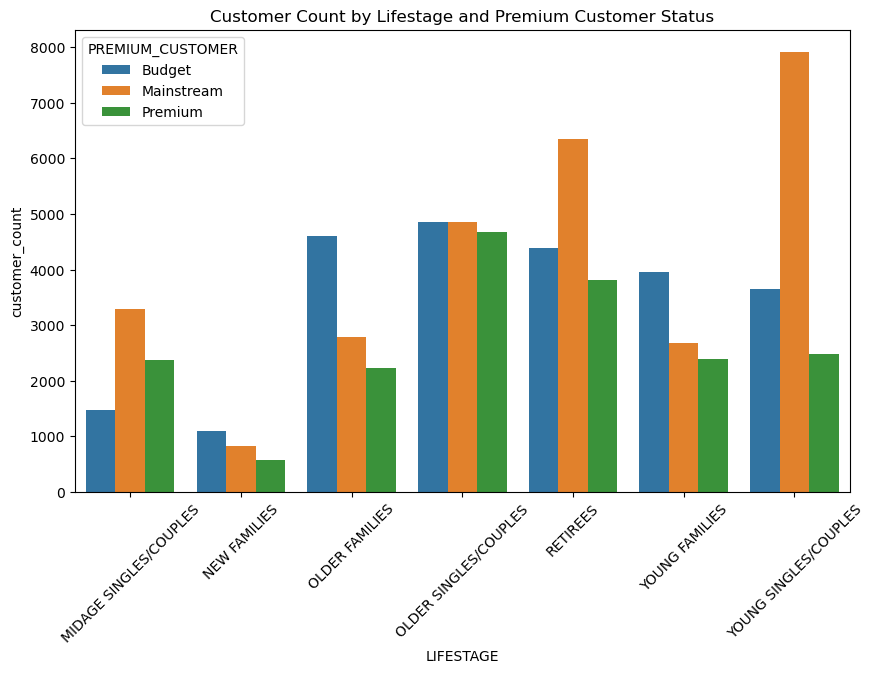

In [32]:
# Count customers by LIFESTAGE and PREMIUM_CUSTOMER
customers_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='customer_count')

# Plot customer count by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='customer_count', hue='PREMIUM_CUSTOMER', data=customers_by_segment)
plt.title('Customer Count by Lifestage and Premium Customer Status')
plt.xticks(rotation=45)
plt.show()

## Average Number of Units Purchased

Let’s calculate the average number of chip units purchased per customer.

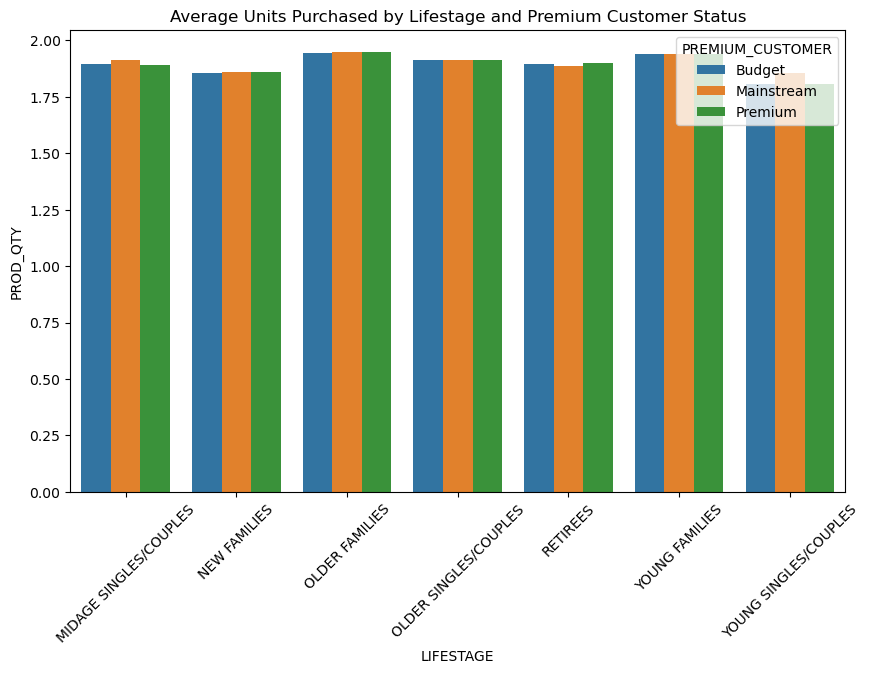

In [34]:
# Calculate average units purchased by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Plot average units purchased by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=avg_units_by_segment)
plt.title('Average Units Purchased by Lifestage and Premium Customer Status')
plt.xticks(rotation=45)
plt.show()

## Average Price per Unit

Finally, let's calculate the average price per unit for each segment.

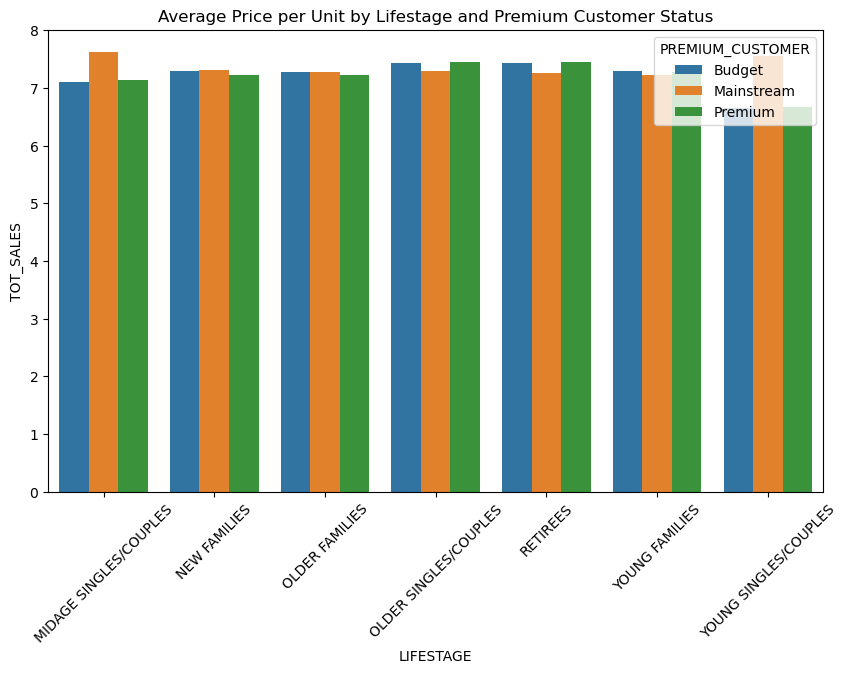

In [35]:
# Calculate average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()

# Plot average price per unit by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=avg_price_by_segment)
plt.title('Average Price per Unit by Lifestage and Premium Customer Status')
plt.xticks(rotation=45)
plt.show()

## Saving Cleaned Data

In [36]:
# Save the cleaned merged data to a CSV
merged_data.to_csv('QVI_cleaned_data.csv', index=False)